In [1]:
import pandas as pd
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter as PF
font = {'fontname':'Liberation Serif'}

In [2]:
# from https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [3]:
data=pd.read_csv('/home/sam/Documents/IIN-ELS/Defesa/6-OHDA_lit.csv')

display(data)

m, b = best_fit_slope_and_intercept(data['Dose'],data['Cell Death'])

regression_line = [(m*x)+b for x in [-.1,.01,.02,.04,.08,.09]]

reg_line = [(m*x)+b for x in data['Dose']]

r_squared = round(coefficient_of_determination(data['Cell Death'],reg_line),4)


rsq='r $^2$ = '+str(r_squared)

print(rsq)

,Cell Death,Dose
0,0.687778,0.045333
1,0.760000,0.045333
2,0.800000,0.030769
3,0.700000,0.069565
4,0.700000,0.034000
5,0.100000,0.003704
6,0.250000,0.007407
7,0.450000,0.014815
8,0.550000,0.029630
9,0.900000,0.059259


r $^2$ = 0.6948


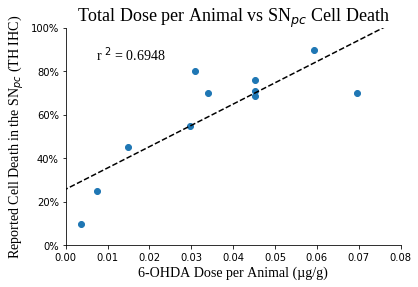

In [4]:
# This cell plots the COM per time

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("6-OHDA Dose per Animal (µg/g)", size=14,**font)

col=['b','y']


#plots the trend line
plt.plot([-.1,.01,.02,.04,.08,.09], regression_line, color='k',linestyle='--', label=rsq)    

#plots the data points
ax.scatter(data['Dose'],data['Cell Death'])


#Y-axis parameters
ax.set_ylabel('Reported Cell Death in the SN$_{pc}$ (TH IHC)',size=14, **font)
plt.ylim(0,1)
plt.xlim(0,.08)
ax.yaxis.set_major_formatter(PF(xmax=1))

#Title and legend parameters
ax.set_title(("Total Dose per Animal vs SN$_{pc}$ Cell Death"), size=18,**font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False).set_visible(False)
ax.annotate(rsq, xy=(100, 200), xycoords='axes points',
            size=14, ha='right', va='top',**font)

display()

file_path1='/home/sam/Documents/IIN-ELS/Defesa/Fig1_6-OHDA_lit.png'

plt.savefig(file_path1, dpi=300, transparent=True)